# Naive (Persistence) Model
* The Forecast of Previous Time Period is the Forecast of Current Time period

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('E:/Time Series Analysis and Forecasting Using Python/1. Time Series - Basics(Data and Code)/daily-min-temperatures.csv', header=0, parse_dates=[0])

In [3]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df['t'] = df.Temp.shift(1)

In [5]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [6]:
df.shape

(3650, 3)

In [7]:
# We will take Last 7 data as Test Data and the rest as Train data
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:] #Ignore the First row

In [9]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [10]:
test.head(10)

,Date,Temp,t
3643,1990-12-25,12.9,10.0
3644,1990-12-26,14.6,12.9
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5
3649,1990-12-31,13.0,15.7


In [11]:
train_x, train_y = train.t, train.Temp
test_x, test_y = test.t, test.Temp

## Walk-Forward Validation

In [12]:
prediction = test_x.copy()

In [14]:
print(prediction, test_y)


3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64 3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


### Lets see the Errors in our Model

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, prediction)
mse

3.4228571428571413

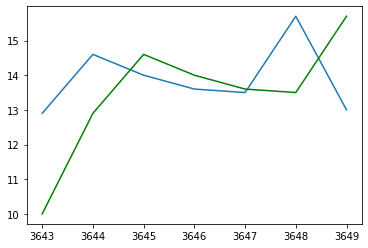

In [20]:
plt.plot(test_y)
plt.plot(prediction, color = 'green')

In [ ]:
# The mse value is very Important to Compare Naive (Persistence) model with Other Advanced Models.